In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# Import the CSV containing the GPS coordinates and their altitude
import os


In [3]:
path = "E:/documents/gis800_articles/jupyter/terrain_profile"
gps = pd.read_csv(os.path.join(path, 'gps.csv'))
gps.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  
0                            Junction at Magadi road  
1                               Start of murram road  
2  Bend before reaching the bridge crossing river...  
3                         a few metres to the bridge  
4  A group of zebras were sighted grazing in an o...

In [4]:
# We want to know the distance for each point from the start point (node) 
# Convert to a dataframe
gps_df = pd.DataFrame(gps)
gps_df.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  
0                            Junction at Magadi road  
1                               Start of murram road  
2  Bend before reaching the bridge crossing river...  
3                         a few metres to the bridge  
4  A group of zebras were sighted grazing in an o...

In [5]:
# Check the class of gps_df
type(gps_df)

pandas.core.frame.DataFrame

In [6]:
from pyproj import CRS

In [7]:
# Now convert to a geodataframe
gps_points = gpd.GeoDataFrame(gps_df, 
                             geometry=gpd.points_from_xy(gps_df['Longitude'], gps_df['Latitude']),
                             crs=CRS.from_authority('EPSG', '4326'))

gps_points.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  \
0                            Junction at Magadi road   
1                               Start of murram road   
2  Bend before reaching the bridge crossing river...   
3                         a few metres to the bridge   
4  A group of zebras were sighted grazing in an o...   

                    geometry  
0  POINT (36.76967 -1.39068)  
1  POINT (36.79066 -1.39868)  
2  POINT (36.79813 -1.39745)  
3  POINT (36.79817 -1.39735)  
4  POINT (36.79962 -1.39969)

In [8]:
# Check the CRS of our geodataframe
gps_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# Calculate distance from origin for each point along the route
# Import the harvesine packag
import haversine as hs

In [10]:
#gps_points['distance_m'] = []

for i, (lat, lon) in enumerate(zip(gps_points['Latitude'], gps_points['Longitude'])):
    print(i, lat, lon)
                             

0 -1.39068412 36.76967061
1 -1.3986755 36.79066426
2 -1.3974481 36.79812947
3 -1.39734767 36.79817471
4 -1.39969483 36.79962135
5 -1.40220242 36.80488978
6 -1.40132149 36.81747036
7 -1.40157005 36.8218044
8 -1.40291262 36.82966621
9 -1.40457771 36.8349445
10 -1.40756392 36.82987579
11 -1.40834375 36.82985959


In [12]:
for i, (lat, lon) in enumerate(zip(gps_points['Latitude'], gps_points['Longitude'])):
    dis = 
                      

SyntaxError: invalid syntax (562022902.py, line 2)

In [13]:
gps_points.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  \
0                            Junction at Magadi road   
1                               Start of murram road   
2  Bend before reaching the bridge crossing river...   
3                         a few metres to the bridge   
4  A group of zebras were sighted grazing in an o...   

                    geometry  
0  POINT (36.76967 -1.39068)  
1  POINT (36.79066 -1.39868)  
2  POINT (36.79813 -1.39745)  
3  POINT (36.79817 -1.39735)  
4  POINT (36.79962 -1.39969)

In [14]:
import matplotlib.pyplot as plt

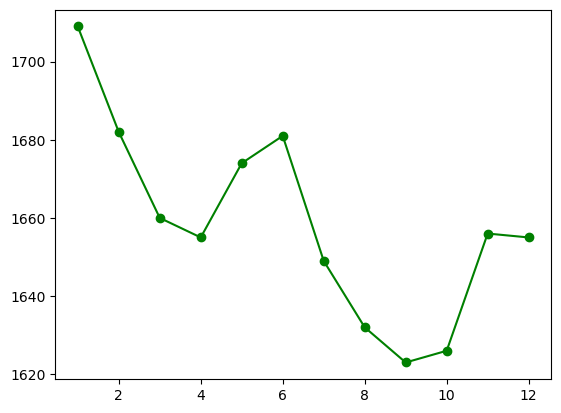

In [15]:
# Draw line chart of our geodataframe altitude

x = gps_points['Point']
y = gps_points['Altitude(m)']

plt.plot(x, y, color='green', marker='o')
plt.show()

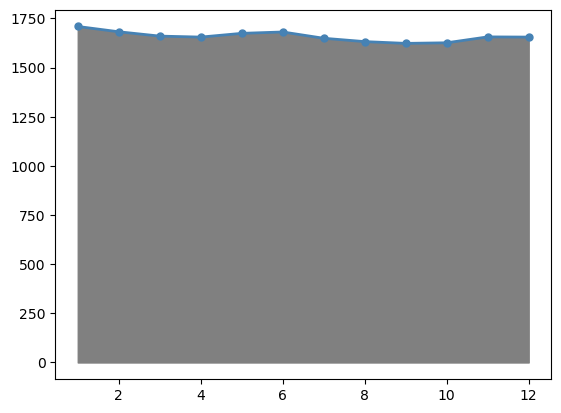

In [16]:
# Draw line chart of our geodataframe altitude

x = gps_points['Point']
y = gps_points['Altitude(m)']
des = gps_points['Description']

plt.plot(x, y, color='steelblue', linewidth=2, marker='o', markersize=5)
plt.fill_between(x, y, color='grey', interpolate='True')
plt.show()

In [17]:
import plotly.express as px

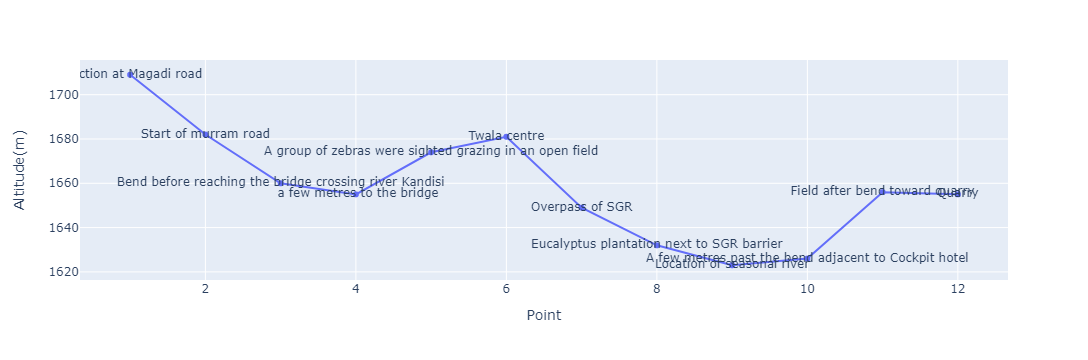

In [18]:
fig = px.line(data_frame=gps_points, x='Point', y='Altitude(m)', text='Description')
fig.show()

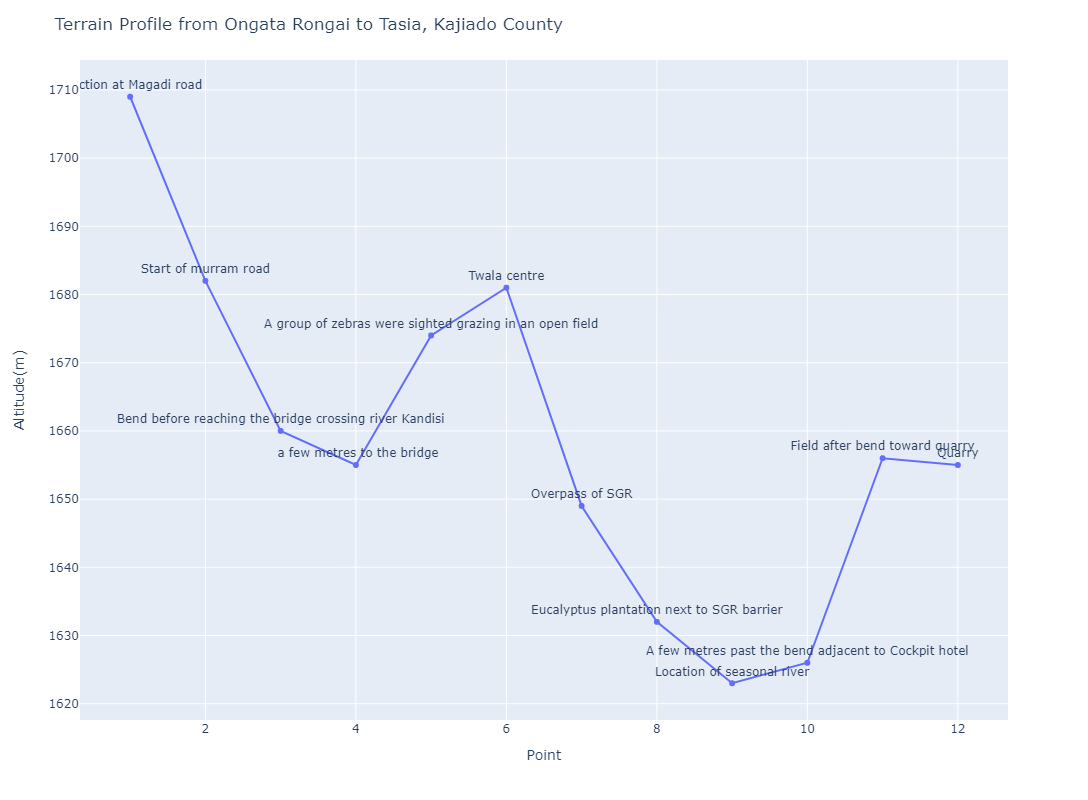

In [19]:
import kaleido
fig = px.line(data_frame=gps_points, x='Point', y='Altitude(m)', text='Description')
fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='Terrain Profile from Ongata Rongai to Tasia, Kajiado County'
)
fig.show()
fig.write_image(os.path.join(path, 'terrain.jpg'), width=1500, height=900)

In [35]:
# generate Linestrings grouping by station
from shapely.geometry import LineString


In [22]:
gps_points.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  \
0                            Junction at Magadi road   
1                               Start of murram road   
2  Bend before reaching the bridge crossing river...   
3                         a few metres to the bridge   
4  A group of zebras were sighted grazing in an o...   

                    geometry  
0  POINT (36.76967 -1.39068)  
1  POINT (36.79066 -1.39868)  
2  POINT (36.79813 -1.39745)  
3  POINT (36.79817 -1.39735)  
4  POINT (36.79962 -1.39969)

In [33]:
geom_list = []
for xy in zip(gps_points['Longitude'], gps_points['Latitude']):
    geom_list.append(xy)
    
print(geom_list)
                             

[(36.76967061, -1.39068412), (36.79066426, -1.3986755), (36.79812947, -1.3974481), (36.79817471, -1.39734767), (36.79962135, -1.39969483), (36.80488978, -1.40220242), (36.81747036, -1.40132149), (36.8218044, -1.40157005), (36.82966621, -1.40291262), (36.8349445, -1.40457771), (36.82987579, -1.40756392), (36.82985959, -1.40834375)]


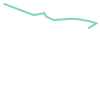

In [38]:
LineString(geom_list)

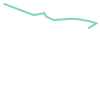

In [40]:
geom_path = LineString(geom_list)
geom_path

In [43]:
type(geom_path)

shapely.geometry.linestring.LineString

In [46]:
# Plot the linestring overlying basemap
import contextily as cx

In [75]:

ax2 = gps_points.plot(figsize=(15, 9), color='blue')
ax2.annotate(text='Description', xy=, xytext=(-4, 2), textcoords='offset points')
#cx.add_basemap(ax, crs=CRS.from_authority('EPSG', '4326'), source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax2, crs=CRS.from_authority('EPSG', '4326'), source=cx.providers.Esri.WorldImagery)

SyntaxError: did you forget parentheses around the comprehension target? (3820461516.py, line 2)

In [53]:
geom_path2 = gpd.GeoDataFrame(geom_path, crs='EPSG:4326')

ValueError: DataFrame constructor not properly called!

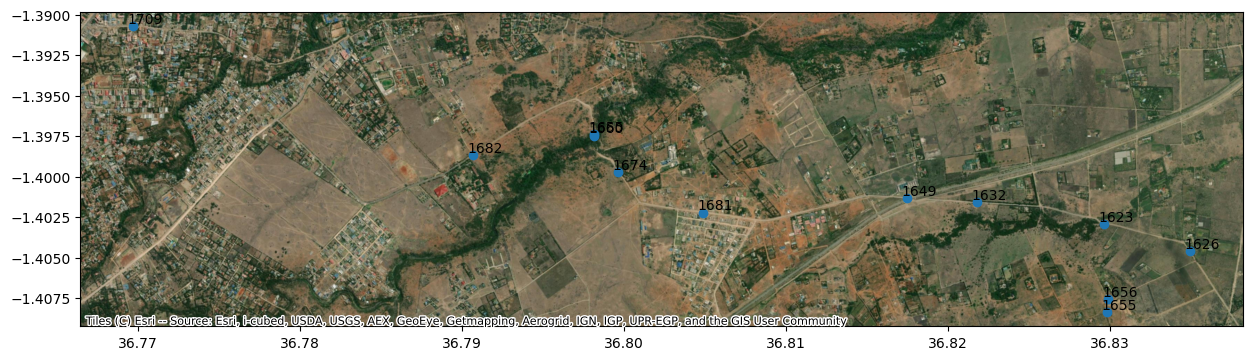

In [83]:
fig, ax = plt.subplots(figsize=(15, 9))
gps_points_map = gps_points.plot(ax=ax)

for alt, lon, lat in zip(gps_points['Altitude(m)'], gps_points['Longitude'], gps_points['Latitude']):
    gps_points_map.annotate(alt, xy=(lon, lat), xytext=(-4, 2), textcoords='offset points')
    
cx.add_basemap(ax, crs=CRS.from_authority('EPSG', '4326'), source=cx.providers.Esri.WorldImagery)